# 2.5 Visual Applications of Machine Learning - Radar

## Contents:

1. Import Libraries
2. Loading and Processing Data
3. Compiling and Running the Model
4. Results
5. Bonus Task

## 1. Import Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from PIL import Image

## 2. Loading and Processing Data

In [23]:
# Download the weather images and put them in a directory

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/Images/Weather'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [25]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [27]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

## 3. Compiling and Running the Model

In [33]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.8192 - loss: 0.0670 - val_accuracy: 0.7639 - val_loss: 0.0905
Epoch 2/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7500 - loss: 0.0677 - val_accuracy: 0.8750 - val_loss: 0.0635
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.8469 - loss: 0.0555 - val_accuracy: 0.8426 - val_loss: 0.0642
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8333 - loss: 0.0454 - val_accuracy: 0.8750 - val_loss: 0.0545
Epoch 5/16


2024-11-13 17:28:56.001899: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.8755 - loss: 0.0461 - val_accuracy: 0.8333 - val_loss: 0.0647
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 0.8750 - val_loss: 0.0533
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.8888 - loss: 0.0409 - val_accuracy: 0.7917 - val_loss: 0.0839
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 9/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - accuracy: 0.9053 - loss: 0.0378 - val_accuracy: 0.8380 - val_loss: 0.0682
Epoch 10/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.7500 - val_loss: 0.0806
Epoch 11/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.8858 - loss: 0.0452 - val_accuracy: 0.7454 - val_loss: 0.1031
Epoch 12/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9167 - loss: 0.0336 - val_accuracy: 0.8750

## 4. Results

In [35]:
results = pd.DataFrame(model.history.history)

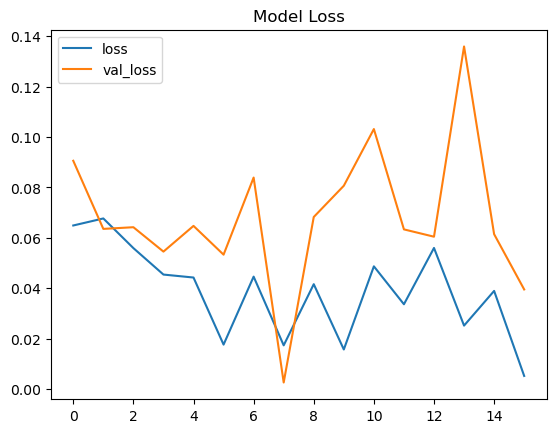

In [37]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

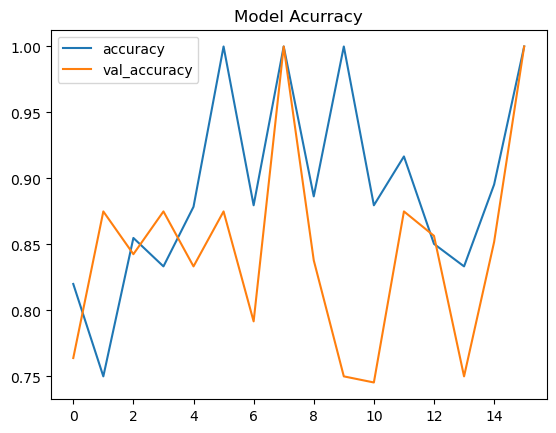

In [39]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [41]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 1.0, Val_Accuracy: 1.0
Loss: 0.005145441275089979, Val_Loss: 0.03947357088327408


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


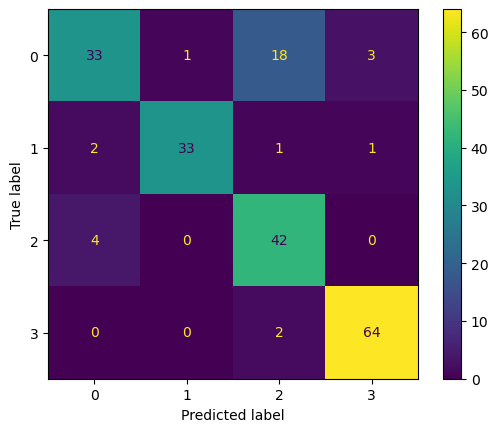

In [43]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [45]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


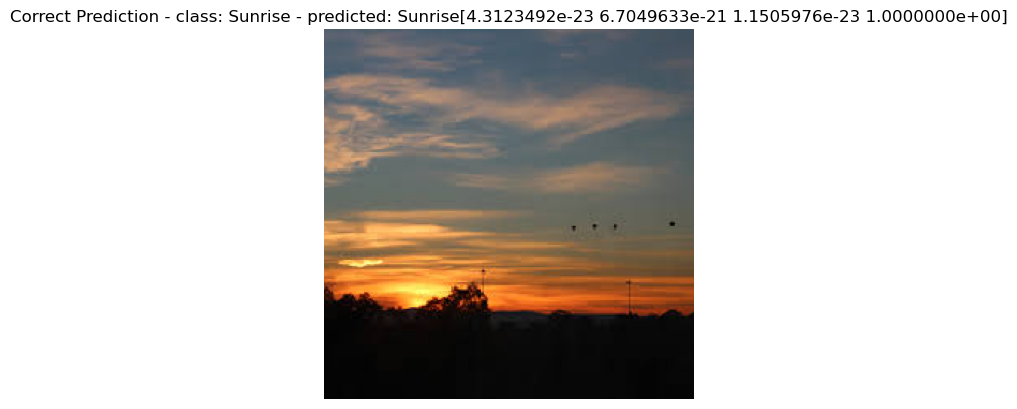

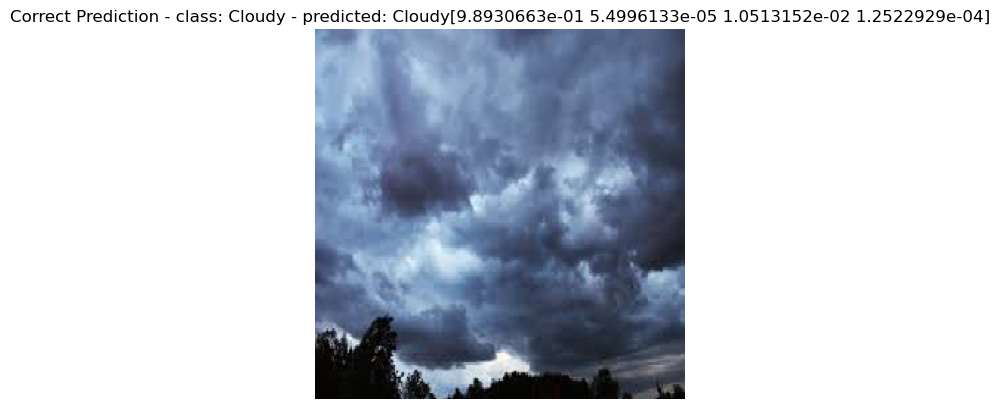

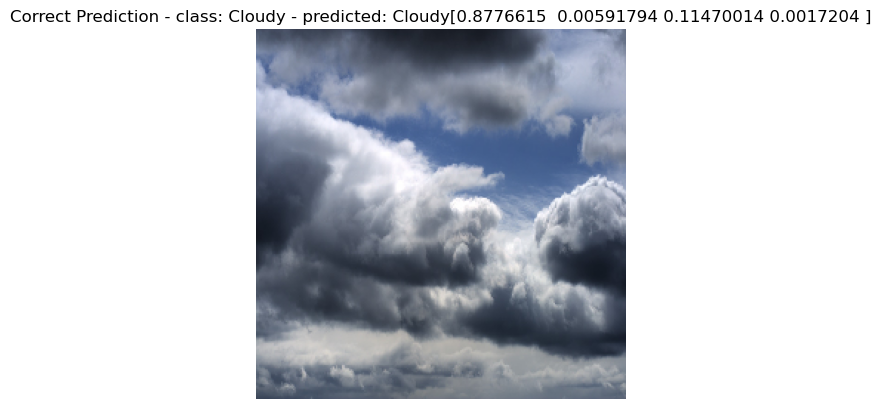

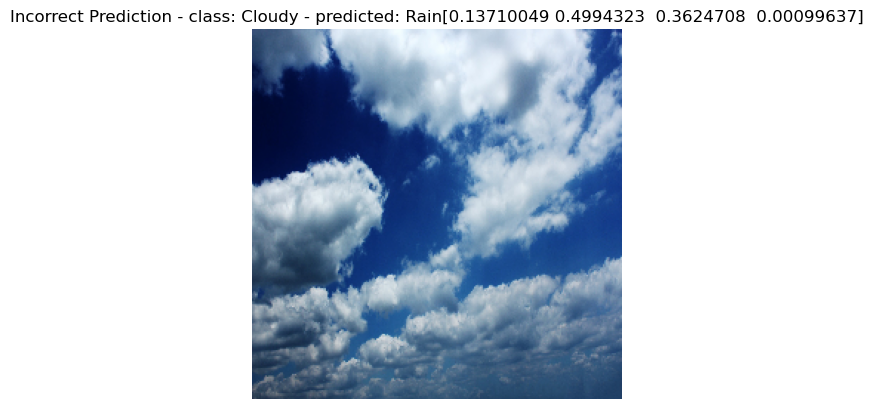

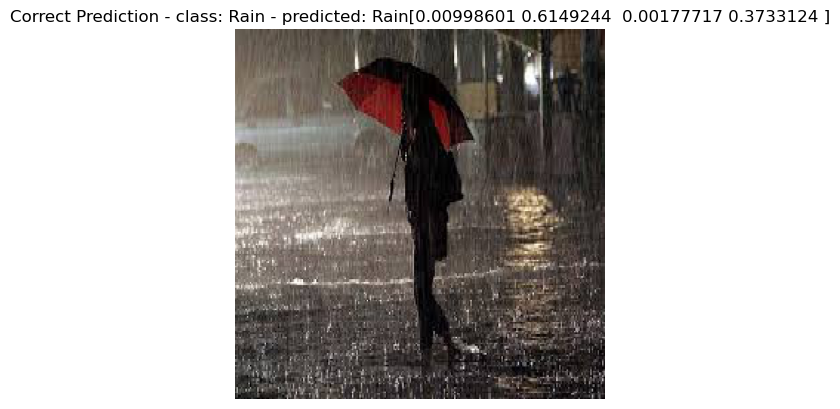

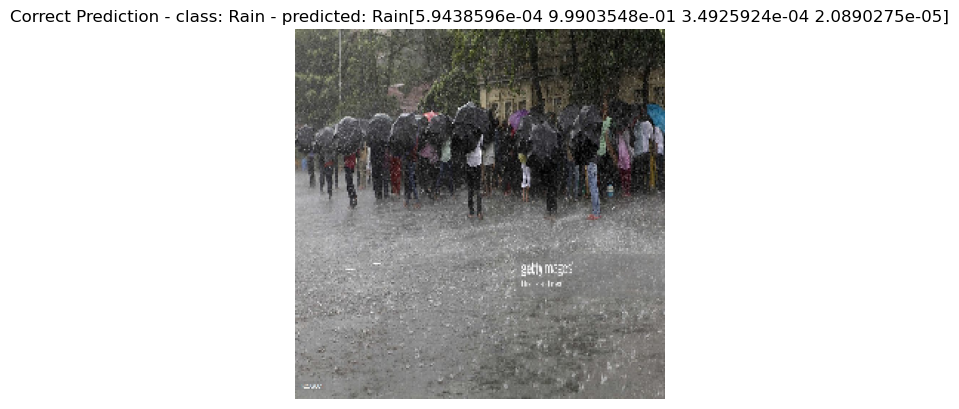

In [47]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

## 5. Bonus Task

In [52]:
path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/Images/'

img = Image.open(os.path.join(path,'myphoto.tiff'))
print(img.format)
print(img.size)
print(img.mode)

TIFF
(3024, 4032)
RGB


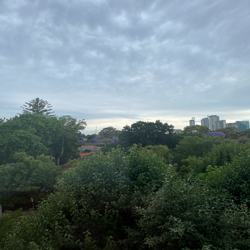

In [54]:
newsize = (250,250)
img2 = img.resize(newsize)
img2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


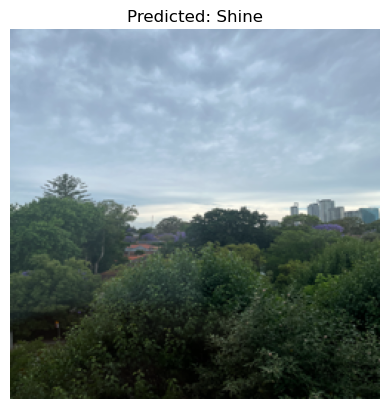

In [56]:
# Define the function to predict and display a single image

def predict_one(model, img2, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img2_rgb = img2.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img2_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img2_rgb)
    plt.show()

# Call the function
predict_one(model, img2, class_names)